# Applying statistical modeling and machine learning to perform time-series forecasting.

Tamara Louie  
PyData LA  
October 2018

# Time-series data due diligence

## Read in my data
**Please download from http://insideairbnb.com/get-the-data.html the following CSV file (23 MB) under the "Los Angeles" section:**

	reviews.csv
  

You should have **reviews.csv** stored somewhere locally. 

Run the cell below, and click on the button **Choose Files**, to select your **reviews.csv** to upload.  

*Note: It will take some time to upload this data, so please start your upload and this upload will run for a couple of minutes.*

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving reviews.csv to reviews.csv
User uploaded file "reviews.csv" with length 22578685 bytes


## Import some relevant packages
Ideally, one should set up their own virtual environment and determine the versions of each library that they are using.  Here, we will assume that the colaboratory environment has some shared environment with access to common Python libraries and the ability to install other libraries necessary.

In [354]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, HTML, display_html
import seaborn as sns
import datetime


# set formatting
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# read in CSV file data
df = pd.read_csv('output/2ModerateLockdown/Netherlands2.csv')

## Look at my data
- How many rows are in the dataset?
- How many columns are in this dataset?
- What data types are the columns?
- Is the data complete? Are there nulls? Do we have to infer values?
- What is the definition of these columns?
- What are some other caveats to the data?


In [9]:
# look at data
display(df.head())

# look a shape of data
display(df.shape)

# look at data types. Ideally look at all rows. Only look at first five here for minimal output.
display(df.iloc[:5,:5].dtypes)

# see if any columns have nulls. Ideally look at all rows. Only look at first five here for minimal output.
display(df.iloc[:5,:5].isnull().any())

# display descriptive statistics
display(df.describe(percentiles=[0.25,0.5,0.75,0.85,0.95,0.99]))

,Unnamed: 0,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k,Unnamed: 29,driving,transit,walking,days
0,54,NLD,Netherlands,2020-03-07,128,46,1,1,7.470,2.685,0.058,0.058,NaN,NaN,NaN,NaN,NaN,17134873,508.544,43.2,18.779,11.881,48472.545,NaN,109.361,5.29,24.4,27.3,NaN,3.32,NaN,105.36,119.53,167.19,1
1,55,NLD,Netherlands,2020-03-08,188,60,1,0,10.972,3.502,0.058,0.000,NaN,NaN,NaN,NaN,NaN,17134873,508.544,43.2,18.779,11.881,48472.545,NaN,109.361,5.29,24.4,27.3,NaN,3.32,NaN,91.72,101.40,103.37,2
2,56,NLD,Netherlands,2020-03-09,265,77,3,2,15.466,4.494,0.175,0.117,NaN,NaN,NaN,NaN,NaN,17134873,508.544,43.2,18.779,11.881,48472.545,NaN,109.361,5.29,24.4,27.3,NaN,3.32,NaN,97.44,98.01,97.60,3
3,57,NLD,Netherlands,2020-03-10,321,56,3,0,18.734,3.268,0.175,0.000,NaN,NaN,NaN,NaN,NaN,17134873,508.544,43.2,18.779,11.881,48472.545,NaN,109.361,5.29,24.4,27.3,NaN,3.32,NaN,94.05,94.36,92.04,4
4,58,NLD,Netherlands,2020-03-11,382,61,4,1,22.294,3.560,0.233,0.058,NaN,NaN,NaN,NaN,NaN,17134873,508.544,43.2,18.779,11.881,48472.545,NaN,109.361,5.29,24.4,27.3,NaN,3.32,NaN,92.55,90.51,99.58,5


(64, 35)

Unnamed: 0      int64
iso_code       object
location       object
date           object
total_cases     int64
dtype: object

Unnamed: 0     False
iso_code       False
location       False
date           False
total_cases    False
dtype: bool

,Unnamed: 0,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k,Unnamed: 29,driving,transit,walking,days
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,12.000000,4.000000,12.000000,4.00000,64.0,6.400000e+01,6.400000e+01,64.000,6.400000e+01,6.400000e+01,0.0,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,0.0,6.400000e+01,0.0,64.000000,64.000000,64.000000,64.000000
mean,85.500000,19873.718750,656.421875,2209.328125,83.734375,1159.840453,38.309094,128.937516,4.886719,162893.833333,3981.000000,9.506500,0.23225,17134873.0,5.085440e+02,4.320000e+01,18.779,1.188100e+01,4.847254e+04,NaN,1.093610e+02,5.290000e+00,2.440000e+01,2.730000e+01,NaN,3.320000e+00,NaN,59.614844,32.271719,62.068594,32.500000
std,18.618987,15225.291155,386.471248,1936.163987,59.038928,888.555826,22.554612,112.995536,3.445498,90405.195290,307.518021,5.276159,0.01784,0.0,8.020989e-13,2.864639e-14,0.000,1.790399e-14,4.400086e-11,NaN,7.161598e-14,2.685599e-15,2.506559e-14,2.864639e-14,NaN,4.475999e-15,NaN,14.295491,22.887675,21.011344,18.618987
min,54.000000,128.000000,46.000000,1.000000,0.000000,7.470000,2.685000,0.058000,0.000000,17080.000000,3817.000000,0.997000,0.22300,17134873.0,5.085440e+02,4.320000e+01,18.779,1.188100e+01,4.847254e+04,NaN,1.093610e+02,5.290000e+00,2.440000e+01,2.730000e+01,NaN,3.320000e+00,NaN,38.990000,17.620000,33.840000,1.000000
25%,69.750000,4060.750000,318.500000,168.250000,30.000000,236.987750,18.587750,9.819500,1.751000,84986.500000,3821.500000,4.959500,0.22300,17134873.0,5.085440e+02,4.320000e+01,18.779,1.188100e+01,4.847254e+04,NaN,1.093610e+02,5.290000e+00,2.440000e+01,2.730000e+01,NaN,3.320000e+00,NaN,49.282500,21.190000,48.332500,16.750000
50%,85.500000,19191.500000,681.500000,1984.000000,85.000000,1120.026000,39.772500,115.787000,4.960500,190520.500000,3832.500000,11.118500,0.22350,17134873.0,5.085440e+02,4.320000e+01,18.779,1.188100e+01,4.847254e+04,NaN,1.093610e+02,5.290000e+00,2.440000e+01,2.730000e+01,NaN,3.320000e+00,NaN,57.505000,24.390000,58.295000,32.500000
75%,101.250000,35063.750000,981.500000,4084.750000,132.000000,2046.338500,57.280500,238.388500,7.704000,243309.500000,3992.000000,14.200000,0.23275,17134873.0,5.085440e+02,4.320000e+01,18.779,1.188100e+01,4.847254e+04,NaN,1.093610e+02,5.290000e+00,2.440000e+01,2.730000e+01,NaN,3.320000e+00,NaN,65.757500,27.897500,66.062500,48.250000
85%,107.550000,38628.300000,1094.550000,4645.750000,146.100000,2254.367850,63.878300,271.128100,8.526350,247529.050000,4172.000000,14.446050,0.24325,17134873.0,5.085440e+02,4.320000e+01,18.779,1.188100e+01,4.847254e+04,NaN,1.093610e+02,5.290000e+00,2.440000e+01,2.730000e+01,NaN,3.320000e+00,NaN,71.634500,31.886500,77.523000,54.550000
95%,113.850000,41039.450000,1222.350000,5155.100000,173.650000,2395.083000,71.336700,300.854150,10.134250,252012.900000,4352.000000,14.707550,0.25375,17134873.0,5.085440e+02,4.320000e+01,18.779,1.188100e+01,4.847254e+04,NaN,1.093610e+02,5.290000e+00,2.440000e+01,2.730000e+01,NaN,3.320000e+00,NaN,92.425500,93.782500,99.283000,60.850000
99%,116.370000,41892.030000,1323.030000,5314.270000,205.650000,2444.840290,77.212330,310.143280,12.001620,253967.380000,4424.000000,14.821510,0.25795,17134873.0,5.085440e+02,4.320000e+01,18.779,1.188100e+01,4.847254e+04,NaN,1.093610e+02,5.290000e+00,2.440000e+01,2.730000e+01,NaN,3.320000e+00,NaN,100.370400,108.108100,126.983400,63.370000


## What are some questions I can answer with this data?

Understand the limitations of your data and what potential questions can be answered by data is important.  These questions can reduce, expand, or modify the scope of your project.

If you defined a scope or goal for your project before digging into the data, this might be a good time to revisit it.

**Data.** We have daily count of reviews for given listing ids for given dates.

**Questions I could try to answer. **

*   Forecast future number of reviews for the Los Angeles area.
* Forecast the future number of reviews for specific listings in the Los Angeles area.

## What techniques may help answer these questions?
### Statistical models
*   **Ignore the time-series aspect completely and model using traditional statistical modeling toolbox.** 
  *   *Examples.* Regression-based models.  
*   **Univariate statistical time-series modeling.**
  *   *Examples.* Averaging and smoothing models, ARIMA models.
*   **Slight modifications to univariate statistical time-series modeling.**
  *    *Examples.* External regressors, multi-variate models.
*   **Additive or component models.**
  *  *Examples.* Facebook Prophet package.
*   **Structural time series modeling.**
  *    *Examples.* Bayesian structural time series modeling, hierarchical time series modeling.

### Machine learning models

*   **Ignore the time-series aspect completely and model using traditional machine learning modeling toolbox.** 
  *   *Examples.* Support Vector Machines (SVMs), Random Forest Regression, Gradient-Boosted Decision Trees (GBDTs).
*   **Hidden markov models (HMMs).**
*   **Other sequence-based models.**
*   **Gaussian processes (GPs).**
*   **Recurrent neural networks (RNNs).**
  
### Additional data considerations before choosing a model
*   Whether or not to incorporate external data
*   Whether or not to keep as univariate or multivariate (i.e., which features and number of features)
*   Outlier detection and removal
*   Missing value imputation

# Let's analyze some time-series data!

- [Link 1](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)
- [Link 2](https://content.nexosis.com/blog/methods-of-demand-forecasting-bsts-prophet)

## Process my data

In [352]:
# # Rename columns
# df = df.rename(columns = {'date': 'ds', 'listing_id': 'ts'})

# # Group data by number of listings per date
# df_example = df.groupby(by = 'ds').agg({'ts': 'count'})

# # Change index to datetime
# df_example.index = pd.to_datetime(df_example.index)

# # Set frequency of time series
# df_example = df_example.asfreq(freq='1D')

# # Sort the values
# df_example = df_example.sort_index(ascending = True)

# # Fill values with 0
# df_example = df_example.fillna(value = 0)
df=df.drop(['Unnamed: 0','Unnamed: 29'],axis=1)
# #2.Remove string features
df=df.drop(['iso_code','location'],axis=1)
# df=df.drop(['date'],axis=1)
# #3.Remove mostly empty featrues
df=df.drop(['total_tests','new_tests','total_tests_per_thousand','tests_units','new_tests_per_thousand'],axis=1)
df=df.drop(['handwashing_facilities'],axis=1)
#4.Remove irrelevant features (Economy)
df=df.drop(['extreme_poverty','gdp_per_capita',],axis=1)
# df
# Show the end of the data
display(df.tail())

KeyError: "['Unnamed: 0' 'Unnamed: 29'] not found in axis"

In [353]:
#remove fixed data 
#df=df.drop(['population','population_density','aged_65_older','aged_70_older','cvd_death_rate','diabetes_prevalence','female_smokers','male_smokers','hospital_beds_per_100k'],axis=1)
#df=df.drop(['median_age'],axis=1)
display(df.tail())

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,driving,transit,walking,days,Lockdown
54,38802,386,4711,145,2264.505,22.527,274.936,8.462,67.31,27.51,59.81,55,2
55,39316,514,4795,84,2294.502,29.997,279.839,4.902,69.38,27.21,61.28,56,2
56,39791,475,4893,98,2322.223,27.721,285.558,5.719,62.34,24.39,61.65,57,1
57,40236,445,4987,94,2348.194,25.970,291.044,5.486,60.40,26.69,64.81,58,1
58,40571,335,5056,69,2367.744,19.551,295.071,4.027,63.65,28.04,64.46,59,1


## Plot my data
- There does appear to be an overall increasing trend. 
- There appears to be some differences in the variance over time. 
- There may be some seasonality (i.e., cycles) in the data.
- Not sure about outliers.

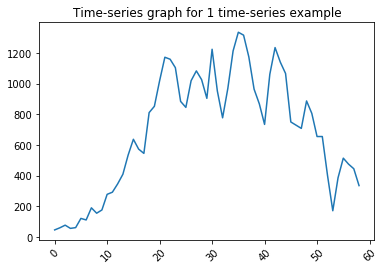

In [3]:
# Plot time series data
f, ax = plt.subplots(1,1)
ax.plot(df['new_cases'])

# Add title
ax.set_title('Time-series graph for 1 time-series example')

# Rotate x-labels
ax.tick_params(axis = 'x', rotation = 45)

# Show graph
plt.show()
plt.close()

In [4]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(df, ts):
    
    """
    Test stationarity using moving average statistics and Dickey-Fuller test
    Source: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
    """
    
    # Determing rolling statistics
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()
    
    # Plot rolling statistics:
    orig = plt.plot(df[ts], 
                    color = 'blue', 
                    label = 'Original')
    mean = plt.plot(rolmean, 
                    color = 'red', 
                    label = 'Rolling Mean')
    std = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    # Perform Dickey-Fuller test:
#     Null Hypothesis (H_0): time series is not stationary
#     Alternate Hypothesis (H_1): time series is stationary
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[ts], 
                      autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

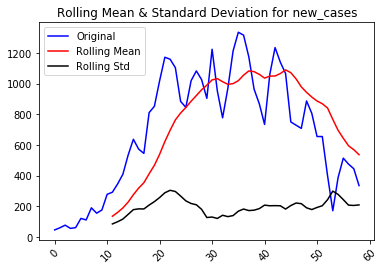

Results of Dickey-Fuller Test:
Test Statistic                 -2.439062
p-value                         0.131014
# Lags Used                     9.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


In [361]:

test_stationarity(df = df, ts = 'new_cases')

## Correct for stationarity

It is common for time series data to have to correct for non-stationarity. 

2 common reasons behind non-stationarity are:

1. **Trend** – mean is not constant over time.
2. **Seasonality** – variance is not constant over time.

There are ways to correct for trend and seasonality, to make the time series stationary.

**What happens if you do not correct for these things?**

Many things can happen, including:
- Variance can be mis-specified
- Model fit can be worse.  
- Not leveraging valuable time-dependent nature of the data.  

Here are some resources on the pitfalls of using traditional methods for time series analysis.  
[Quora link](https://www.quora.com/Why-cant-you-use-linear-regression-for-time-series-data)  
[Quora link](https://www.quora.com/Data-Science-Can-machine-learning-be-used-for-time-series-analysis)  


## Eliminating trend and seasonality
*   **Transformation**
  *   *Examples.* Log, square root, etc.
  *   We are going to look at log.
*   **Smoothing**
  *  *Examples.* Weekly average, monthly average, rolling averages.
  *   We are going to look at weekly average.
*   **Differencing**
  *  *Examples.* First-order differencing.
  *   We are going to look at first-order differencing.
*   **Polynomial Fitting**
  *  *Examples.* Fit a regression model.
*   **Decomposition**

## Transformation, Smoothing, and Differencing
**Looking at our data:**
- Applying log transformation, weekly moving average smoothing, and differencing made the data more stationary over time. Based on **Dickey-Fuller test**, because p = < 0.05, we fail to reject the null hypothesis (that the time series is not stationary) at the p = 0.05 level, thus concluding that the **time series is stationary**.

In [6]:
def plot_transformed_data(df, ts, ts_transform):
    """
    Plot transformed and original time series data
    """
    # Plot time series data
    f, ax = plt.subplots(1,1)
    ax.plot(df[ts])
    ax.plot(df[ts_transform], color = 'red')

    # Add title
    ax.set_title('%s and %s time-series graph' %(ts, ts_transform))

    # Rotate x-labels
    ax.tick_params(axis = 'x', rotation = 45)

    # Add legend
    ax.legend([ts, ts_transform])

    plt.show()
    plt.close()

    return

In [373]:
# Transformation - log ts
#print(df['new_cases'])
print(np.diff(df['new_cases']))
pd.Series([3,4])
#df2 = pd.DataFrame(['new_cases_2'])
#df.apply(lambda col: col.drop_duplicates().reset_index(drop=True))
num2= np.diff(df['new_cases'],2)

# #df['new_cases_log_log'] = df['new_cases'].apply(lambda x: np.log(np.log(np.log(x))))
# # df['new_cases_log_log'] = df['new_cases_log'].apply(lambda x: np.log(x))
# # df['new_cases_log_log_log'] = df['new_cases_log_log'].apply(lambda x: np.log(x))
# # # Transformation - 7-day moving averages of log ts
# # df['new_cases_log_moving_avg'] = df['new_cases_log'].rolling(window = 3,
# # Plot data
# # plot_transformed_data(df = df, 
# #                       ts = 'new_cases', 
# #                       ts_transform = 'new_cases_log_log')
dftest = adfuller(num2, 
                      autolag='AIC')
dfoutput = pd.Series(dftest[0:4], 
                     index = ['Test Statistic',
                              'p-value',
                              '# Lags Used',
                              'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)
# # # Perform stationarity test
# test_stationarity(df = df2, 
#                   ts = 'new_cases_2')

[  14   17  -21    5   60  -10   79  -35   21  102   14   54   63  125
  103  -64  -28  266   41  167  153  -13  -55 -220  -39  174   64  -57
 -122  320 -272 -175  192  244  122  -19 -142 -210  -96 -134  327  174
  -95  -74 -316  -21  -21  179  -81 -151    0 -255 -229  215  128  -39
  -30 -110]
Test Statistic                -7.210614e+00
p-value                        2.239941e-10
# Lags Used                    6.000000e+00
Number of Observations Used    5.000000e+01
Critical Value (1%)           -3.568486e+00
Critical Value (5%)           -2.921360e+00
Critical Value (10%)          -2.598662e+00
dtype: float64


## Decomposition: trend, seasonality, residuals
**Looking at our data:**
- De-trending and de-seasonalizing made the data (i.e., the residuals) more stationary over time. Based on **Dickey-Fuller test**, because p = < 0.05, we fail to reject the null hypothesis (that the time series is not stationary) at the p = 0.05 level, thus concluding that the **time series is stationary**.

In [8]:
def plot_decomposition(df, ts, trend, seasonal, residual):
    """
    Plot time series data
    """
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15, 5), sharex = True)

    ax1.plot(df[ts], label = 'Original')
    ax1.legend(loc = 'best')
    ax1.tick_params(axis = 'x', rotation = 45)

    ax2.plot(df[trend], label = 'Trend')
    ax2.legend(loc = 'best')
    ax2.tick_params(axis = 'x', rotation = 45)

    ax3.plot(df[seasonal],label = 'Seasonality')
    ax3.legend(loc = 'best')
    ax3.tick_params(axis = 'x', rotation = 45)

    ax4.plot(df[residual], label = 'Residuals')
    ax4.legend(loc = 'best')
    ax4.tick_params(axis = 'x', rotation = 45)
    plt.tight_layout()

    # Show graph
    plt.suptitle('Trend, Seasonal, and Residual Decomposition of %s' %(ts), 
               x = 0.5, 
               y = 1.05, 
               fontsize = 18)
    plt.show()
    plt.close()

    return

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_example_transform['ts_log'], freq = 365)

df_example_transform.loc[:,'trend'] = decomposition.trend
df_example_transform.loc[:,'seasonal'] = decomposition.seasonal
df_example_transform.loc[:,'residual'] = decomposition.resid

plot_decomposition(df = df_example_transform, 
                   ts = 'ts_log', 
                   trend = 'trend',
                   seasonal = 'seasonal', 
                   residual = 'residual')

test_stationarity(df = df_example_transform.dropna(), ts = 'residual')

NameError: name 'df_example_transform' is not defined

# Let us model some time-series data! Finally! ARIMA models.

We will be doing an example here! We can use ARIMA models when we know there is dependence between values and we can leverage that information to forecast.

**ARIMA = Auto-Regressive Integrated Moving Average**.   
**Assumptions.** The time-series is stationary.  
**Depends on:**  
  **1. Number of AR (Auto-Regressive) terms (p).**  
  **2. Number of I (Integrated or Difference) terms (d).**  
  **3. Number of MA (Moving Average) terms (q).**  

## ACF and PACF Plots
**How do we determine p, d, and q?**
For p and q, we can use ACF and PACF plots (below).

**Autocorrelation Function (ACF).** Correlation between the time series with a lagged version of itself (e.g., correlation of Y(t) with Y(t-1)).

**Partial Autocorrelation Function (PACF).** Additional correlation explained by each successive lagged term.

**How do we interpret ACF and PACF plots?**
- p – Lag value where the PACF chart crosses the upper confidence interval for the first time.
- q – Lag value where the ACF chart crosses the upper confidence interval for the first time.


In [383]:
def plot_acf_pacf(df, ts):
    """
    Plot auto-correlation function (ACF) and partial auto-correlation (PACF) plots
    """
    f, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5)) 

    #Plot ACF: 

    ax1.plot(lag_acf)
    ax1.axhline(y=0,linestyle='--',color='gray')
    ax1.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
    ax1.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
    ax1.set_title('Autocorrelation Function for %s' %(ts))

    #Plot PACF:
    ax2.plot(lag_pacf)
    ax2.axhline(y=0,linestyle='--',color='gray')
    ax2.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
    ax2.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
    ax2.set_title('Partial Autocorrelation Function for %s' %(ts))

    plt.tight_layout()
    plt.show()
    plt.close()

    return

[ 1.          0.89984391  0.78518909  0.70205008  0.64324635  0.60726199
  0.56949134  0.52132985  0.43206248  0.30022963  0.18390668  0.12862281
  0.09850434  0.06402117  0.00493736 -0.05997421 -0.13507333 -0.21677464
 -0.2684374  -0.29544975 -0.29301781]
[ 1.          0.91535846 -0.1550808   0.1409071   0.06420591  0.12020163
 -0.03013837 -0.03735471 -0.31261056 -0.38331328 -0.13200125  0.20569659
  0.0254498  -0.02636625 -0.18573538  0.03767868 -0.10333108 -0.18641314
 -0.15090029 -0.23606588  0.22356066]


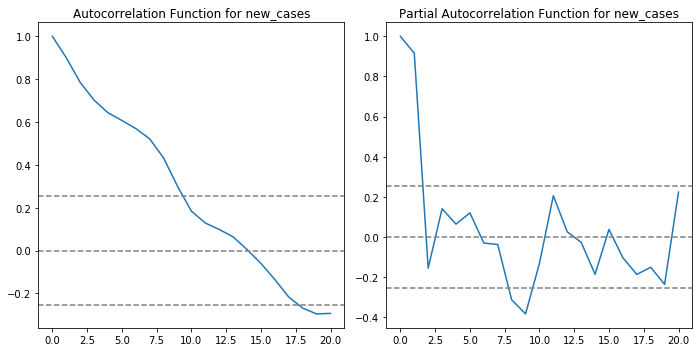

In [384]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

# determine ACF and PACF
lag_acf = acf(np.array(df['new_cases']), nlags = 20)
lag_pacf = pacf(np.array(df['new_cases']), nlags = 20)
print(lag_acf)
print(lag_pacf)
# plot ACF and PACF
plot_acf_pacf(df = df, ts = 'new_cases')

[828.29469027 755.19547283 562.71102491 502.12047018 436.77218798
 544.44769629 532.20588431 522.5428247  417.29499168]
nan


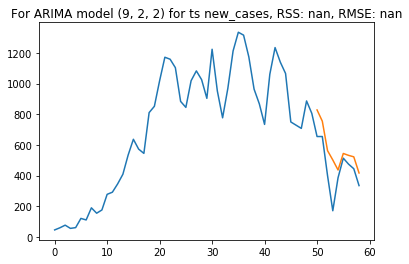

In [380]:
from statsmodels.tsa.arima_model import ARIMA
def run_arima_model(df, ts, p, d, q):
    """
    Run ARIMA model
    """
    #print(df[ts][0:50])
    # fit ARIMA model on time series
    model = ARIMA(df[ts][0:50], order=(p, d, q))  
    results_ = model.fit(disp=-1)  
    prediction=results_.forecast(steps=9)[0]
    print(prediction)
    # get lengths correct to calculate RSS
    len_results = len(results_.fittedvalues)
    ts_modified = df[ts][-len_results:]
    
    # calculate root mean square error (RMSE) and residual sum of squares (RSS)
    rss = sum((results_.fittedvalues - ts_modified)**2)
    rmse = np.sqrt(rss / len(df[ts]))
    mse = rss / len(df[ts])
    print(rmse)
    # plot fit
    plt.plot(df[ts],label="true")
    #plt.plot(results_.fittedvalues, color = 'red')
    plt.title('For ARIMA model (%i, %i, %i) for ts %s, RSS: %.4f, RMSE: %.4f' %(p, d, q, ts, rss, rmse))
    x = np.arange(50,59,1)  
    plt.plot(x,prediction,label="prediction")
    plt.show()
    plt.close()

    return results_
model_AR = run_arima_model(df = df, 
                           ts = 'new_cases', 
                           p = 9, 
                           d = 2, 
                           q = 2)


In [33]:
# Note: I do the differencing in the transformation of the data 'ts_log_diff'
# AR model with 1st order differencing - ARIMA (1,0,0)
model_AR = run_arima_model(df = df, 
                           ts = 'new_cases', 
                           p = 1, 
                           d = 0, 
                           q = 0)

# MA model with 1st order differencing - ARIMA (0,0,1)
model_MA = run_arima_model(df = df, 
                           ts = 'total_cases', 
                           p = 0, 
                           d = 0, 
                           q = 1)

# ARMA model with 1st order differencing - ARIMA (1,0,1)
model_MA = run_arima_model(df = df, 
                           ts = 'total_cases', 
                           p = 1, 
                           d = 0, 
                           q = 1)

KeyError: 'n'

# Let us model some time-series data! Finally! Facebook Prophet package.

We will be doing an example here! Installing the necessary packages might take a couple of minutes.  In the meantime, I can talk a bit about [Facebook Prophet](https://facebook.github.io/prophet/), a tool that allows folks to forecast using additive or component models relatively easily.  It can also include things like:
* Day of week effects
* Day of year effects
* Holiday effects
* Trend trajectory
* Can do MCMC sampling

In [22]:
!pip install pystan
!pip install fbprophet
from fbprophet import Prophet
import datetime
from datetime import datetime

     |████████████████████████████████| 39.1MB 1.2MB/s eta 0:00:01
     |████████████████████████████████| 61kB 3.2MB/s eta 0:00:011
     |████████████████████████████████| 51kB 4.4MB/s eta 0:00:011
     |████████████████████████████████| 112kB 2.0MB/s eta 0:00:01
     |████████████████████████████████| 1.5MB 4.4MB/s eta 0:00:01
     |████████████████████████████████| 737kB 5.1MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /Applications/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/fp/2d2vgv6n00l67fh92dmqvr_h0000gn/T/pip-install-r7puzlj8/fbprophet/setup.py'"'"'; __file__='"'"'/private/var/folders/fp/2d2vgv6n00l67fh92dmqvr_h0000gn/T/pip-install-r7puzlj8/fbprophet/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/fp/2d2vgv6n00l67fh92dmqvr_h0000

Importing plotly failed. Interactive plots will not work.


In [23]:
def days_between(d1, d2):
    """Calculate the number of days between two dates.  D1 is start date (inclusive) and d2 is end date (inclusive)"""
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days + 1)

In [ ]:
# Inputs for query

date_column = 'dt'
metric_column = 'ts'
table = df_example
start_training_date = '2010-07-03'
end_training_date = '2018-09-08'
start_forecasting_date = '2018-09-09'
end_forecasting_date = '2018-12-31'
year_to_estimate = '2018'

# Inputs for forecasting

# future_num_points
# If doing different time intervals, change future_num_points
future_num_points = days_between(start_forecasting_date, end_forecasting_date)

cap = None # 2e6

# growth: default = 'linear'
# Can also choose 'logistic'
growth = 'linear'

# n_changepoints: default = 25, uniformly placed in first 80% of time series
n_changepoints = 25 

# changepoint_prior_scale: default = 0.05
# Increasing it will make the trend more flexible
changepoint_prior_scale = 0.05 

# changpoints: example = ['2016-01-01']
changepoints = None 

# holidays_prior_scale: default = 10
# If you find that the holidays are overfitting, you can adjust their prior scale to smooth them
holidays_prior_scale = 10 

# interval_width: default = 0.8
interval_width = 0.8 

# mcmc_samples: default = 0
# By default Prophet will only return uncertainty in the trend and observation noise.
# To get uncertainty in seasonality, you must do full Bayesian sampling. 
# Replaces typical MAP estimation with MCMC sampling, and takes MUCH LONGER - e.g., 10 minutes instead of 10 seconds.
# If you do full sampling, then you will see the uncertainty in seasonal components when you plot:
mcmc_samples = 0

# holiday: default = None
# thanksgiving = pd.DataFrame({
#   'holiday': 'thanksgiving',
#   'ds': pd.to_datetime(['2014-11-27', '2015-11-26',
#                         '2016-11-24', '2017-11-23']),
#   'lower_window': 0,
#   'upper_window': 4,
# })
# christmas = pd.DataFrame({
#   'holiday': 'christmas',
#   'ds': pd.to_datetime(['2014-12-25', '2015-12-25', 
#                         '2016-12-25','2017-12-25']),
#   'lower_window': -1,
#   'upper_window': 0,
# })
# holidays = pd.concat((thanksgiving,christmas))
holidays = None

daily_seasonality = True

In [ ]:
# get relevant data - note: could also try this with ts_log_diff
df_prophet = df_example_transform[['ts']] # can try with ts_log_diff

# reset index
df_prophet = df_prophet.reset_index()

# rename columns
df_prophet = df_prophet.rename(columns = {'ds': 'ds', 'ts': 'y'}) # can try with ts_log_diff

# Change 'ds' type from datetime to date (necessary for FB Prophet)
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# Change 'y' type to numeric (necessary for FB Prophet)
df_prophet['y'] = pd.to_numeric(df_prophet['y'], errors='ignore')

# Remove any outliers
# df.loc[(df_['ds'] > '2016-12-13') & (df_['ds'] < '2016-12-19'), 'y'] = None

In [ ]:
def create_daily_forecast(df,
#                           cap,
                          holidays,
                          growth,
                          n_changepoints = 25,
                          changepoint_prior_scale = 0.05,
                          changepoints = None,
                          holidays_prior_scale = 10,
                          interval_width = 0.8,
                          mcmc_samples = 1,
                          future_num_points = 10, 
                          daily_seasonality = True):
    """
    Create forecast
    """

    # Create copy of dataframe
    df_ = df.copy()

    # Add in growth parameter, which can change over time
    #     df_['cap'] = max(df_['y']) if cap is None else cap

    # Create model object and fit to dataframe
    m = Prophet(growth = growth,
              n_changepoints = n_changepoints,
              changepoint_prior_scale = changepoint_prior_scale,
              changepoints = changepoints,
              holidays = holidays,
              holidays_prior_scale = holidays_prior_scale,
              interval_width = interval_width,
              mcmc_samples = mcmc_samples, 
              daily_seasonality = daily_seasonality)

    # Fit model with dataframe
    m.fit(df_)

    # Create dataframe for predictions
    future = m.make_future_dataframe(periods = future_num_points)
    #     future['cap'] = max(df_['y']) if cap is None else cap

    # Create predictions
    fcst = m.predict(future)

    # Plot
    m.plot(fcst);
    m.plot_components(fcst)

    return fcst

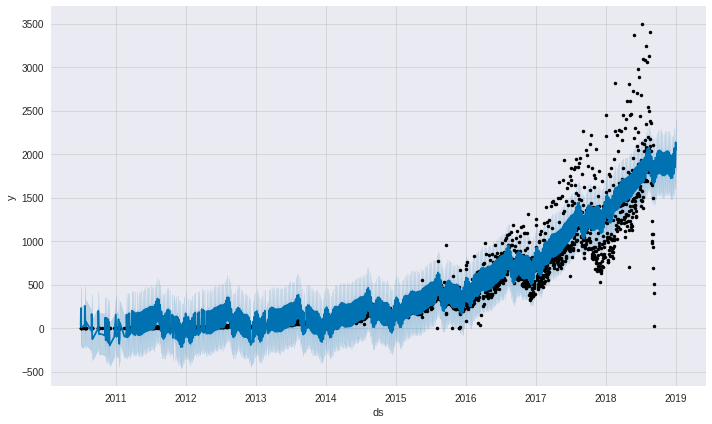

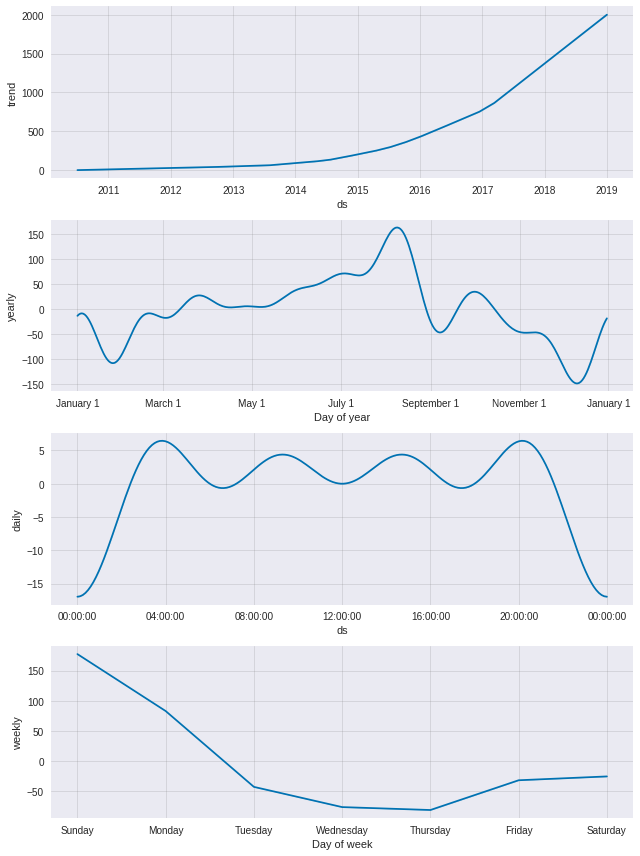

In [ ]:
fcst = create_daily_forecast(df_prophet,
#                              cap,
                             holidays,
                             growth,
                             n_changepoints,
                             changepoint_prior_scale,
                             changepoints, 
                             holidays_prior_scale,
                             interval_width,
                             mcmc_samples,
                             future_num_points, 
                             daily_seasonality)

In [ ]:
def calculate_mape(y_true, y_pred):
    """ Calculate mean absolute percentage error (MAPE)"""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_mpe(y_true, y_pred):
    """ Calculate mean percentage error (MPE)"""
    return np.mean((y_true - y_pred) / y_true) * 100

def calculate_mae(y_true, y_pred):
    """ Calculate mean absolute error (MAE)"""
    return np.mean(np.abs(y_true - y_pred)) * 100

def calculate_rmse(y_true, y_pred):
    """ Calculate root mean square error (RMSE)"""
    return np.sqrt(np.mean((y_true - y_pred)**2))

def print_error_metrics(y_true, y_pred):
    print('MAPE: %f'%calculate_mape(y_true, y_pred))
    print('MPE: %f'%calculate_mpe(y_true, y_pred))
    print('MAE: %f'%calculate_mae(y_true, y_pred))
    print('RMSE: %f'%calculate_rmse(y_true, y_pred))
    return

In [ ]:
print_error_metrics(y_true = df_prophet['y'], y_pred = fcst['yhat'])

MAPE: 489.853947
MPE: 61.942978
MAE: 11526.827186
RMSE: 189.137808


# Let us model some time-series data! Finally! LSTM for regression

We will be going through an example here.

Also, here are some resources on recurrent neural networks (RNN) and Long Short-Term Memory networks (LSTMs):
* [Link 1](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)
* [Link 2](https://blog.statsbot.co/time-series-prediction-using-recurrent-neural-networks-lstms-807fa6ca7f)
* [Link 3](http://adventuresinmachinelearning.com/recurrent-neural-networks-lstm-tutorial-tensorflow/)

In [31]:
def do_lstm_model(df, 
                  ts, 
                  look_back, 
                  epochs, 
                  type_ = None, 
                  train_fraction = 0.67):
    """
    Create LSTM model
    Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
    """
    # Import packages
    import numpy
    import matplotlib.pyplot as plt
    from pandas import read_csv
    import math
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.layers import LSTM
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics import mean_squared_error

  # Convert an array of values into a dataset matrix
    def create_dataset(dataset, look_back=1):
        """
        Create the dataset
        """
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back), 0]
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
        return numpy.array(dataX), numpy.array(dataY)

    # Fix random seed for reproducibility
    numpy.random.seed(7)

    # Get dataset
    dataset = df[ts].values
    dataset = dataset.astype('float32')

    # Normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset.reshape(-1, 1))

    # Split into train and test sets
    train_size = int(len(dataset) * train_fraction)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

    # Reshape into X=t and Y=t+1
    look_back = look_back
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)

    # Reshape input to be [samples, time steps, features]
    if type_ == 'regression with time steps':
        trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
        testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
    elif type_ == 'stacked with memory between batches':
        trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
        testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
    else:
        trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

    # Create and fit the LSTM network
    batch_size = 1
    model = Sequential()

    if type_ == 'regression with time steps':
        model.add(LSTM(4, input_shape=(look_back, 1)))
    elif type_ == 'memory between batches':
        model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
    elif type_ == 'stacked with memory between batches':
        model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
        model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
    else:
        model.add(LSTM(4, input_shape=(1, look_back)))

        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer='adam')

    if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
        for i in range(100):
            model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
            model.reset_states()
        else:
            model.fit(trainX, 
                      trainY, 
                      epochs = epochs, 
                      batch_size = 1, 
                      verbose = 2)

    # Make predictions
    if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
        trainPredict = model.predict(trainX, batch_size=batch_size)
        testPredict = model.predict(testX, batch_size=batch_size)
    else:
        trainPredict = model.predict(trainX)
        testPredict = model.predict(testX)

    # Invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

    # Calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))

    # Shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset)
    trainPredictPlot[:, :] = numpy.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

    # Shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

    # Plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.show()
    plt.close()

    return

Train Score: 704.37 RMSE
Test Score: 531.78 RMSE


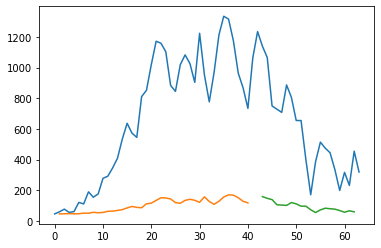

Train Score: 868.43 RMSE
Test Score: 579.57 RMSE


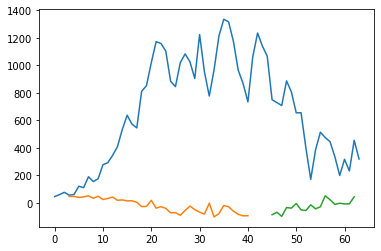

Train Score: 857.32 RMSE
Test Score: 552.96 RMSE


ValueError: could not broadcast input array from shape (38,4) into shape (38,1)

In [32]:
# LSTM Network for Regression
do_lstm_model(df = df, 
              ts = 'new_cases', 
              look_back = 1, 
              epochs = 5)

# LSTM for Regression Using the Window Method
do_lstm_model(df = df, 
              ts = 'new_cases', 
              look_back = 3, 
              epochs = 5)

# LSTM for Regression with Time Steps
do_lstm_model(df = df, 
              ts = 'new_cases', 
              look_back = 3, 
              epochs = 5, 
              type_ = 'regression with time steps')

# # LSTM with Memory Between Batches
# do_lstm_model(df = df_prophet, 
#               ts = 'y', 
#               look_back = 3, 
#               epochs = 5, 
#               type_ = 'memory between batches')

# # Stacked LSTMs with Memory Between Batches
# do_lstm_model(df = df_prophet, 
#               ts = 'y', 
#               look_back = 3, 
#               epochs = 5, 
#               type_ = 'stacked with memory between batches')

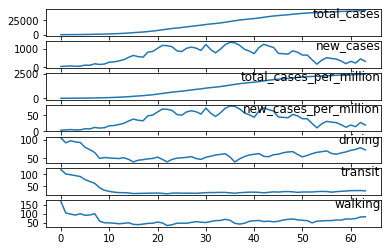

In [40]:
from matplotlib import pyplot
# load dataset
dataset = df
values = dataset.values
# specify columns to plot
groups = [1, 2, 5, 6,-4,-3,-2,]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential  #Sequential 用于初始化神经网络
from keras.layers import Dense       #Dense 用于添加全连接的神经网络层
from keras.layers import LSTM        #LSTM 用于添加长短期内存层
from keras.layers import Dropout     #Dropout 用于添加防止过拟合的dropout层
#构建训练数据
def train_data():
    dataset_train = df
    training_set = dataset_train.iloc[:,1:12].values
    print(dataset_train.tail())
    sc = MinMaxScaler(feature_range = (0, 1))
    training_set_scaled = sc.fit_transform(training_set)
    n=len(training_set_scaled)
    #print(training_set_scaled)
    X_train = []
    y_train = []
    for i in range(n)
        X_train.append(training_set_scaled[i, :])
        y_train.append(training_set_scaled[i, 2])
    X_train, y_train = np.array(X_train), np.array(y_train)      
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 12))
    
    return X_train,y_train,dataset_train,sc
#构建测试数据

train_data()

          date  total_cases  new_cases  total_deaths  new_deaths  \
59  2020-05-05        40770        199          5082          26   
60  2020-05-06        41087        317          5168          86   
61  2020-05-07        41319        232          5204          36   
62  2020-05-08        41774        455          5288          84   
63  2020-05-09        42093        319          5359          71   

    total_cases_per_million  new_cases_per_million  total_deaths_per_million  \
59                 2379.358                 11.614                   296.588   
60                 2397.858                 18.500                   301.607   
61                 2411.398                 13.540                   303.708   
62                 2437.952                 26.554                   308.610   
63                 2456.569                 18.617                   312.754   

    new_deaths_per_million  driving  transit  walking  days  
59                   1.517    66.65    29.16    

In [ ]:
def test_data(dataset_train,sc):
    dataset_test = pd.read_csv('tatatest.csv')
    real_stock_price = dataset_test.iloc[:, 1:2].values
    #合并训练集和测试集
    dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
    db_all = dataset_total.iloc[:, 1:7].values
    inputs = db_all[len(dataset_total) - len(dataset_test) - 60:]
    inputs = inputs.reshape(-1,6)
    inputs = sc.transform(inputs)
    X_test = []
    for i in range(60, 76):
        X_test.append(inputs[i-60:i, :])
        #X_test.append(inputs[i-60:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 6))
    
    return X_test,real_stock_price
#创建股票预测模型
def stock_model(X_train, y_train):
    regressor = Sequential()
    #LSTM的输入为 [samples, timesteps, features],这里的timesteps为步数，features为维度 这里我们的数据是6维的
    regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 6)))
    
    regressor.add(Dropout(0.2))
    
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))
    #全连接，输出6个
    regressor.add(Dense(units = 6))
    
    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
    regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
    
    return regressor
def main():
    X_train, y_train,dataset_train,sc = train_data()
    
    regressor = stock_model(X_train, y_train)
    X_test,real_stock_price = test_data(dataset_train,sc)
    predicted_stock_price = regressor.predict(X_test)
    
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)
    
    plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
    #显示开盘价
    plt.plot(predicted_stock_price[:,0], color = 'green', label = 'Predicted TATA Stock Price')
    plt.title('TATA Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('TATA Stock Price')
    plt.legend()
    plt.show()
if __name__ == '__main__':
    main()